In [1]:
import os
from astropy.io import fits
import sunpy.map
#from sunpy.coordinates import NorthOffsetFrame
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
from scipy import ndimage
import numpy as np
import sunpy.timeseries
import scipy.ndimage as ndimage
from scipy.ndimage import label
from scipy.optimize import curve_fit
from scipy.interpolate import RegularGridInterpolator

In [40]:

R_sun = 6.96e10

dtr=np.pi/180
rtd=180/np.pi
folder_path = "/home/anu/Desktop/samapti"
save_dir1="/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere"
save_dir2= "/home/anu/Desktop/samapti/carrington/synoptic fits files/North hemisphere"
save_dir3= "/home/anu/Desktop/samapti/2025/after correction"
save_dir4="/home/anu/Desktop/samapti/2025/before shift"

files = os.listdir(folder_path)
fits_files = glob.glob(os.path.join(folder_path, '*.fits'))
for file in fits_files:
    
    print(fits_files)
    with fits.open(file)as f:
        header = f[0].header
        print(header)
        data=f[0].data
        newdata=np.roll(data,-600)
        nx=data.shape[1]
        ny=data.shape[0]
        
        
        base_name = os.path.basename(file).replace('.fits', '')
        
        fig = plt.figure(figsize=(12,6))
        plt.imshow(data, origin="lower", cmap='gray', aspect=1)              #vmax=100, vmin=-100
        image_name= f" {base_name}_beforecorrection.jpeg"
        mag_image= os.path.join(save_dir4, image_name)
        plt.savefig(mag_image, dpi=300)
        plt.close(fig)
        fig = plt.figure(figsize=(12,6))
        plt.imshow(newdata, origin="lower", cmap='gray', aspect=1)              #vmax=100, vmin=-100
        image_name= f" {base_name}_aftercorrection.jpeg"
        mag_image= os.path.join(save_dir3, image_name)
        plt.savefig(mag_image, dpi=300)
        plt.close(fig)
        
        
        
     



['/home/anu/Desktop/samapti/hmi.mrdailysynframe_720s.20140101_120000_TAI.data.fits']
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 3600 / length of data axis 1                          NAXIS2  =                 1440 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            CHECKSUM= 'VMI2YMF1VMF1VMF1'   / HDU checksum updated 2025-06-18T10:47:55       DATASUM = '169439355'          / data unit checksum updated 2014-07-18T23:28:49 DATE    = '2014-07-18T23:28:22.000' / [ISO] HDU creation date                   TELESCOP= 'SDO/HMI '           / Telescope                                      INSTRUME= 'HMI_SIDE1'          / For HMI: HMI_SIDE1, HMI_FRONT2, or HMI_COMBINEDWAVELNTH=                6173. / [a

In [ ]:
 LON_FRST=   826966.79999980924 / [degree] 
 LON_LAST=   827326.69999980927 / [degree] Last Carrington Time
CRLN_OBS=           13.3944387 / [deg] #06.18
 CRPIX1  =                1800.
    CRVAL1  =   827146.79999980924
LON_FRST=   826953.49999961851 / [degree]
 LON_LAST=   827313.39999961853 / [degree] Last Carrington Time #06.17
CRLN_OBS=   26.631261800000001 / [deg]     

In [25]:
print(826953.49999961851 -827313.39999961853)
print(-80+120)
print(2250.25%1)
print(  13.3944387 -60)
print(13.3944387-26.631261800000001)
print(26.631261800000001-39.868099200000003 )

-359.9000000000233
40
0.25
-46.6055613
-13.2368231
-13.236837400000002


In [19]:
print((46.6055613+13.3944387)/0.10000000000000001)

600.0


In [41]:
CRLN_OBS=           182.931152
0.10000000000000001 
print(182.931152-60)

122.931152


In [42]:
print((182.931152-122.931152)/0.10000000000000001)

600.0


In [20]:
newdata=np.roll(data, -600)

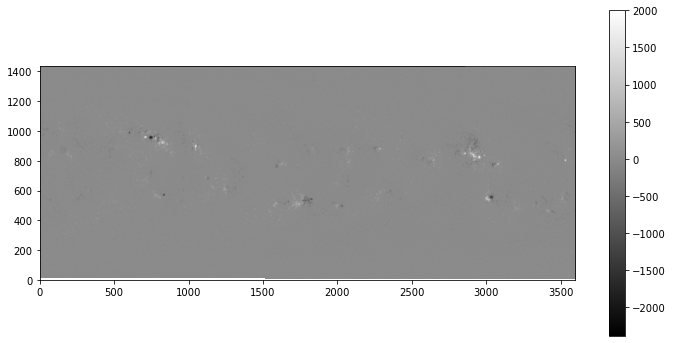

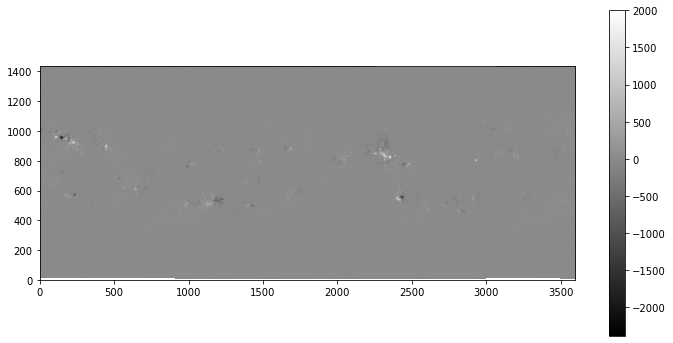

In [23]:
#2025.06.18


fig = plt.figure(figsize=(12,6))
plt.imshow(data, origin="lower", cmap='gray', aspect=1)              #vmax=100, vmin=-100
plt.colorbar()
fig = plt.figure(figsize=(12,6))
plt.imshow(newdata, origin="lower", cmap='gray', aspect=1)              #vmax=100, vmin=-100
plt.colorbar()


/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere/ hmi.Synoptic_Mr_small.2298_SH.txt
p = -17.568137136423157, q1 = 5.104496424186124, r1=1.2065783650119182
14.466627142361029


/tmp/ipykernel_4670/3028223891.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc=ax.pcolormesh(x,y,Flux,cmap='gray')


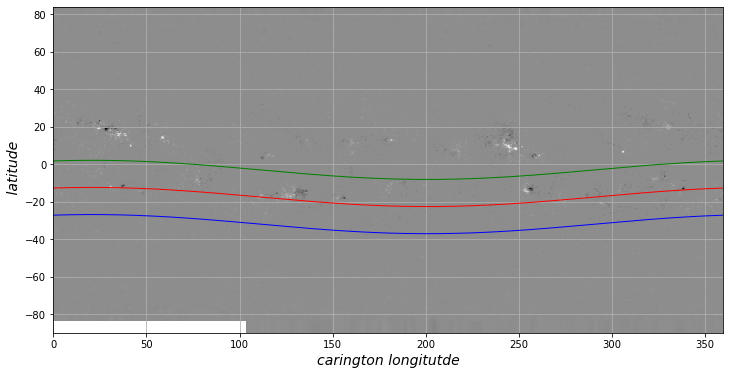

In [22]:
folder_path3="/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
RMS=[]

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)
    Params, Cov = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params[0]}, q1 = {Params[1]}, r1={Params[2]}")
    Y=model(M, *Params)
#print(SY)
    SQ=np.subtract(Q,Y)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error1=model(lon, *Params)+rms
    Error2=model(lon, *Params)-rms
    
    base_name = os.path.basename(Sfile).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    ax=fig.add_subplot(111) 
    plt.plot (lon,model(lon, *Params), color="Red" ,linewidth=1)
    plt.plot(lon,Error1, color="green",linewidth=1)
    plt.plot(lon,Error2, color="blue",linewidth=1)
    
    pc=ax.pcolormesh(x,y,Flux,cmap='gray')
    ax.grid(True)

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    #plt.savefig(mag_image, dpi=300)
    #plt.close(fig)

In [119]:
folder_path3="/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)
    Params2, Cov2 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params2[0]}, q1 = {Params2[1]}, r1={Params2[2]},q2={Params2[3]},r2={Params2[4]}")
    Y2=model(M, *Params2)
#print(SY)
    SQ=np.subtract(Q,Y2)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error3=model(lon, *Params2)+rms
    Error4=model(lon, *Params2)-rms
    
    base_name = os.path.basename(Sfile).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params2), color="Red" ,linewidth=1)
    plt.plot(lon,Error3, color="green",linewidth=1)
    plt.plot(lon,Error4, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF2.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere/ hmi.Synoptic_Mr.2298_SH.txt
p = -12.660684077206845, q1 = 1.5630623547032527, r1=1.0981381468475868,q2=3.011983319971683,r2=0.6523112447832523
3.4105497401809823


/tmp/ipykernel_6178/1226803634.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [120]:
folder_path3="/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)
    Params3, Cov3 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params3[0]}, q1 = {Params3[1]}, r1={Params3[2]},q2={Params3[3]},r2={Params3[4]},q3={Params3[5]},r3={Params3[6]}")
    Y3=model(M, *Params3)
#print(SY)
    SQ=np.subtract(Q,Y3)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    
#print(Srms)
    Error5=model(lon, *Params3)+rms
    Error6=model(lon, *Params3)-rms
    
    base_name = os.path.basename(Sfile).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params3), color="Red" ,linewidth=1)
    plt.plot(lon,Error5, color="green",linewidth=1)
    plt.plot(lon,Error6, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF3.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere/ hmi.Synoptic_Mr.2298_SH.txt
p = -11.990333215430626, q1 = 0.6664499417368163, r1=0.306988705989731,q2=3.467683149291861,r2=0.55926205830692,q3=-1.8196037257148312,r3=0.35031090140225574
3.2503286824366073


/tmp/ipykernel_6178/1766123186.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [121]:
folder_path3="/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3,q4,r4):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)+q4*np.sin(4*S+r4)
    Params4, Cov4 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params4[0]}, q1 = {Params4[1]}, r1={Params4[2]},q2={Params4[3]},r2={Params4[4]},q3={Params4[5]},r3={Params4[6]},q4={Params4[7]},r4={Params4[8]}")
    Y4=model(M, *Params4)
#print(SY)
    SQ=np.subtract(Q,Y4)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
#print(Srms)
    Error7=model(lon, *Params4)+rms
    Error8=model(lon, *Params4)-rms
    
    base_name = os.path.basename(Sfile).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params4), color="Red" ,linewidth=1)
    plt.plot(lon,Error7, color="green",linewidth=1)
    plt.plot(lon,Error8, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF4.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere/ hmi.Synoptic_Mr.2298_SH.txt
p = -12.11109328339037, q1 = 0.6804564320780151, r1=-0.4039682758408275,q2=3.8355977148732805,r2=0.3130697617487355,q3=-2.3551492112805503,r3=0.4984420683572755,q4=2.4181210839013407,r4=4.07689125799918
3.0558458066985548


/tmp/ipykernel_6178/995100289.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [122]:
folder_path3="/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Sfile in txt_files:
    P=[]
    Q=[]
    print(Sfile)
    with open (Sfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                P.append(fhi)
                Q.append(lamda)
    M=np.array(P)
    def model(lon,p,q1,r1,q2,r2,q3,r3,q4,r4,q5,r5):
        S= (lon*np.pi)/180
        return p+q1*np.sin(S+r1)+q2*np.sin(2*S+r2)+q3*np.sin(3*S+r3)+q4*np.sin(4*S+r4)+q5*np.sin(5*S+r5)
    Params5, Cov5 = curve_fit(model,M,Q,method = 'trf')
    print(f"p = {Params5[0]}, q1 = {Params5[1]}, r1={Params5[2]},q2={Params5[3]},r2={Params5[4]},q3={Params5[5]},r3={Params5[6]},q4={Params5[7]},r4={Params5[8]},q5={Params5[9]},r5={Params5[10]}")
    Y5=model(M, *Params5)
#print(SY)
    SQ=np.subtract(Q,Y5)
#print(SQ)
    mean=np.mean(SQ**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    #print(RMS)
#print(Srms)
    Error9=model(lon, *Params5)+rms
    Error10=model(lon, *Params5)-rms
    
    base_name = os.path.basename(Sfile).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *Params5), color="Red" ,linewidth=1)
    plt.plot(lon,Error9, color="green",linewidth=1)
    plt.plot(lon,Error10, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_STF5.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/synoptic fits files/South hemisphere/ hmi.Synoptic_Mr.2298_SH.txt
p = -11.651979981740995, q1 = 0.8231332910571596, r1=-1.4391129369720739,q2=4.4944728024520435,r2=0.33397538583056274,q3=-2.7495621293220713,r3=0.08827895191951356,q4=2.6504630425208004,r4=4.2658851304559695,q5=1.1171865108490098,r5=0.3938480522267641
3.0278792667785828


/tmp/ipykernel_6178/3077529693.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [123]:
folder_path3="/home/anu/Desktop/samapti/carrington/synoptic fits files/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
RMS=[]

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)
    params1, Cov1 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params1[0]}, b= {params1[1]}, c={params1[2]}")
    Y1=model(N, *params1)
#print(SY)
    NB=np.subtract(B,Y1)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    
    
#print(Srms)
    error1=model(lon, *params1)+rms
    error2=model(lon, *params1)-rms
    
    base_name = os.path.basename(Nfile).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params1), color="Red" ,linewidth=1)
    plt.plot(lon,error1, color="green",linewidth=1)
    plt.plot(lon,error2, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/synoptic fits files/North hemisphere/ hmi.Synoptic_Mr.2298_NH.txt
a= 13.139639814546332, b= 5.641211503308287, c=1.7634075799864717
4.218208602995638


/tmp/ipykernel_6178/1038612392.py:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [124]:
folder_path3="/home/anu/Desktop/samapti/carrington/synoptic fits files/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)
    params2, Cov2 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params2[0]}, b1= {params2[1]}, c1={params2[2]},b2={params2[3]},c2={params2[4]}")
    Y2=model(N, *params2)
#print(SY)
    NB=np.subtract(B,Y2)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error3=model(lon, *params2)+rms
    error4=model(lon, *params2)-rms
    
    base_name = os.path.basename(Nfile).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params2), color="Red" ,linewidth=1)
    plt.plot(lon,error3, color="green",linewidth=1)
    plt.plot(lon,error4, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF2.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/synoptic fits files/North hemisphere/ hmi.Synoptic_Mr.2298_NH.txt
a= 12.799369284376409, b1= 5.1969519510500986, c1=2.0348949657139404,b2=3.5729355606095345,c2=1.401598002127257
3.90911354843805


/tmp/ipykernel_6178/1777759595.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [125]:
folder_path3="/home/anu/Desktop/samapti/carrington/synoptic fits files/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)
    params3, Cov3 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params3[0]}, b1= {params3[1]}, c1={params3[2]},b2={params3[3]},c2={params3[4]},b3={params3[5]},c3={params3[6]}")
    Y3=model(N, *params3)
#print(SY)
    NB=np.subtract(B,Y3)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error5=model(lon, *params3)+rms
    error6=model(lon, *params3)-rms
    
    base_name = os.path.basename(Nfile).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params3), color="Red" ,linewidth=1)
    plt.plot(lon,error5, color="green",linewidth=1)
    plt.plot(lon,error6, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF3.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/synoptic fits files/North hemisphere/ hmi.Synoptic_Mr.2298_NH.txt
a= 12.845119785247942, b1= 5.1944563782502104, c1=2.035707715434739,b2=3.5693807354803804,c2=1.36438934482833,b3=-0.265770178465032,c3=0.6685039699445063
3.9068467707518364


/tmp/ipykernel_6178/844103322.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [126]:
folder_path3="/home/anu/Desktop/samapti/carrington/synoptic fits files/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
    print(Nfile)
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3,b4,c4):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)+b4*np.sin(4*S+c4)
    params4, Cov4 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params4[0]}, b1= {params4[1]}, c1={params4[2]},b2={params4[3]},c2={params4[4]},b3={params4[5]},c3={params4[6]},b4={params4[7]},c4={params4[8]}")
    Y4=model(N, *params4)
#print(SY)
    NB=np.subtract(B,Y4)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error7=model(lon, *params4)+rms
    error8=model(lon, *params4)-rms
    
    base_name = os.path.basename(Nfile).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params4), color="Red" ,linewidth=1)
    plt.plot(lon,error7, color="green",linewidth=1)
    plt.plot(lon,error8, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF4.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)

/home/anu/Desktop/samapti/carrington/synoptic fits files/North hemisphere/ hmi.Synoptic_Mr.2298_NH.txt
a= 11.714832784789705, b1= 4.736948080635124, c1=1.8612895707860841,b2=4.919224646489225,c2=1.4831110412247466,b3=0.8705731111640144,c3=0.998227780511949,b4=-2.9727062022107362,c4=0.8466346875560398
3.713687604259339


/tmp/ipykernel_6178/1220351035.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')


In [127]:

folder_path3="/home/anu/Desktop/samapti/carrington/synoptic fits files/North hemisphere"
Files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))

for Nfile in txt_files:
    A=[]
    B=[]
 
    with open (Nfile, "r") as infile:
          for line in infile:
            parts=line.split()
            if len(parts)==2:
                fhi=float(parts[0])
                lamda=float(parts[1])
                A.append(fhi)
                B.append(lamda)
    N=np.array(A)
    def model(lon,a,b1,c1,b2,c2,b3,c3,b4,c4,b5,c5):
        S= (lon*np.pi)/180
        return a+b1*np.sin(S+c1)+b2*np.sin(2*S+c2)+b3*np.sin(3*S+c3)+b4*np.sin(4*S+c4)+b5*np.sin(5*S+c5)
    params5, Cov5 = curve_fit(model,N,B,method = 'trf')
    print(f"a= {params5[0]}, b1= {params5[1]}, c1={params5[2]},b2={params5[3]},c2={params5[4]},b3={params5[5]},c3={params5[6]},b4={params5[7]},c4={params5[8]},b5={params5[9]},c5={params5[10]}")
    Y5=model(N, *params5)
#print(SY)
    NB=np.subtract(B,Y5)
#print(SQ)
    mean=np.mean(NB**2)
#print(Smean)
    rms=np.sqrt(mean)
    print(rms)
    RMS.append(rms)
    error9=model(lon, *params5)+rms
    error10=model(lon, *params5)-rms
    
    base_name = os.path.basename(Nfile).replace('.txt', '')
    fig = plt.figure(figsize=(12,6))
    plt.plot (lon,model(lon, *params5), color="Red" ,linewidth=1)
    plt.plot(lon,error9, color="green",linewidth=1)
    plt.plot(lon,error10, color="blue",linewidth=1)
    plt.pcolormesh(x,y,Flux,cmap='gray')

    plt.xlabel("carington longitutde", color="black", fontsize=14, fontstyle="oblique")
    plt.ylabel(" latitude", color="black", fontsize=14, fontstyle="oblique")
    image_name= f" {base_name}_NTF5.jpeg"
    mag_image= os.path.join(save_dir4, image_name)
    plt.savefig(mag_image, dpi=300)
    plt.close(fig)


a= 11.086637469775182, b1= 4.853220159346888, c1=1.4739808597020883,b2=4.639776985510484,c2=1.3794961160806394,b3=-1.4285625939979971,c3=-0.3413828052554851,b4=-2.909072334289786,c4=0.5099969088895168,b5=2.651359360211149,c5=-0.5969559733404678
3.555184134833333


/tmp/ipykernel_6178/1074132076.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Flux,cmap='gray')
